# 10 scipy

Scipy is a package that contains classes and functions for a wide range of numerical problems. Among them signal processing, linear algebra, statistics and optimization. We'll have a quick look at the statistics module, but you should know there is more.

In [10]:
from scipy import stats

In [38]:
a = np.random.randn(100, 1) + 90
b = np.random.randn(100, 1) + 95

Assuming, `a` and `b` are independent samples, use a t-test to compute the probability of the observed or a more extreme mean difference under the hypothesis that both samples are drawn from the same population.

In [41]:
#your code here


Scipy.stats also provides classes for probability distributions. You can create instances of these classes like this.

In [11]:
#create an object of a beta(2,2)-distribution
beta = stats.beta(2, 2)

Now this object can be used to do things like generating random values or computing PDF and CDF. And a lot more.

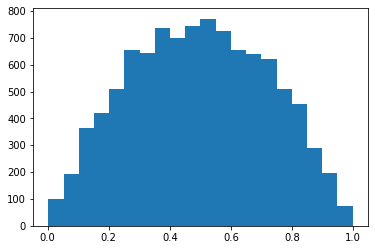

In [13]:
#generate a lot of random values from gamma(2,2)
random_values = beta.rvs(10000)
#visualize them
import matplotlib.pyplot as plt
plt.hist(random_values, bins=20)
plt.show()

**Exercise** 

Use `stats.norm` to "prove" that for a normal distribution the AUC between -2 and 2 standard deviations is ~95%. *Hint*: Use the cumulative density function.

In [13]:
#your code here
